## Concrete Crack Images for Classification

---

#### Modelo Red Neuronal Simple

In [2]:
# Cargamos las librerias necesarias
import sys
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import zipfile
import pandas as pd
import seaborn as sns
from PIL import Image
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files

In [3]:
# CONFIGURACIÓN Y DESCARGA DE DATOS
files.upload()
# Mover credenciales (ajusta si es necesario)
if not os.path.exists('/root/.kaggle'):
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json

# Descargar Dataset: Concrete Crack Images for Classification
# ID del dataset: arunrk7/surface-crack-detection (versión limpia del original de Ozgenel)
print("Descargando dataset...")
!kaggle datasets download -d arunrk7/surface-crack-detection

# Descomprimir
print("Descomprimiendo...")
with zipfile.ZipFile('surface-crack-detection.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

print("Descarga completada")

Saving kaggle.json to kaggle.json
Descargando dataset...
Dataset URL: https://www.kaggle.com/datasets/arunrk7/surface-crack-detection
License(s): copyright-authors
 61% 142M/233M [00:00<00:00, 1.49GB/s]
100% 233M/233M [00:00<00:00, 764MB/s] 
Descomprimiendo...
Descarga completada


In [4]:
# CARGA Y CREACIÓN DEL DATAFRAME

# Definir rutas
base_dir = Path('./data')
positive_dir = base_dir / 'Positive' # Grietas
negative_dir = base_dir / 'Negative' # Sin Grietas

# Generar lista de archivos
# Buscamos todas las imágenes .jpg
positive_images = list(positive_dir.glob('*.jpg'))
negative_images = list(negative_dir.glob('*.jpg'))

# Crear DataFrame
# Label 1 = Grieta (Positive), Label 0 = Sin Grieta (Negative)
images_df = pd.DataFrame({
    'filepath': [str(x) for x in positive_images] + [str(x) for x in negative_images],
    'label': [1] * len(positive_images) + [0] * len(negative_images)
})

# Mezclar datos (Shuffle)
images_df = images_df.sample(frac=1, random_state=42).reset_index(drop=True)

X_paths = images_df['filepath'].values
y = images_df['label'].values

print(f"\n--- VARIABLES FINALES ---")
print(f"X (Rutas): {X_paths.shape}")
print(f"y (Etiquetas): {y.shape}")


--- VARIABLES FINALES ---
X (Rutas): (40000,)
y (Etiquetas): (40000,)


In [5]:
# Crear carpeta de modelos
os.makedirs('models', exist_ok=True)
# Crear el archivo .py
with open('models/cnn_simple.py', 'w') as f:
    f.write("""
import tensorflow as tf
from tensorflow.keras import layers, models

def build_simple_cnn(input_shape=(227, 227, 3)):
    model = models.Sequential([
        layers.Input(shape=input_shape),

        # Una sola capa convolucional
        # Usamos 8 filtros de 3x3 para detectar bordes básicos
        layers.Conv2D(8, (3, 3), activation='relu', padding='same'),

        # Global Average Pooling: Reduce cada mapa de activación a un solo número
        # Esto sustituye a las capas Flatten y Dense pesadas
        layers.GlobalAveragePooling2D(),

        # Capa de salida: 1 neurona para clasificación binaria
        layers.Dense(1, activation='sigmoid')
    ])
    return model
""")

print("Archivo models/cnn_simple.py creado con éxito.")

Archivo models/cnn_simple.py creado con éxito.


In [6]:
sys.path.append('./models')
from cnn_simple import build_simple_cnn

Train: 24000, Val: 8000, Test: 8000
Found 24000 validated image filenames belonging to 2 classes.
Found 8000 validated image filenames belonging to 2 classes.
Found 8000 validated image filenames belonging to 2 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 227, 227, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 8)              │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 233 (932.00 B)

 Trainable params: 233 (932.00 B)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 378s 500ms/step - accuracy: 0.5754 - loss: 0.6931 - val_accuracy: 0.5548 - val_loss: 0.6878
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 413s 541ms/step - accuracy: 0.6545 - loss: 0.6835 - val_accuracy: 0.6959 - val_loss: 0.6690
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 382s 510ms/step - accuracy: 0.6832 - loss: 0.6663 - val_accuracy: 0.7031 - val_loss: 0.6485
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 375s 500ms/step - accuracy: 0.6908 - loss: 0.6480 - val_accuracy: 0.6991 - val_loss: 0.6317
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 385s 513ms/step - accuracy: 0.6972 - loss: 0.6313 - val_accuracy: 0.7166 - val_loss: 0.6186
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 383s 511ms/step - accuracy: 0.7015 - loss: 0.6200 - val_accuracy: 0.6860 - val_loss: 0.6137
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 380s 507ms/step - accuracy: 0.7119 - loss: 0.6122 - val_accuracy: 0.7120 - val_loss: 0.6057
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 389s 516ms/step - accuracy: 0.7360 -

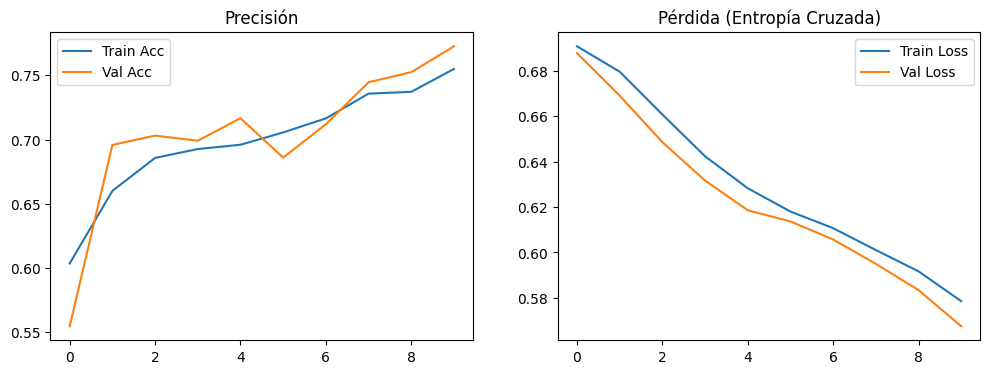

Métricas para: Train
Accuracy: 0.5068
              precision    recall  f1-score   support

    Sano (0)       0.51      0.59      0.54     12000
  Grieta (1)       0.51      0.42      0.46     12000

    accuracy                           0.51     24000
   macro avg       0.51      0.51      0.50     24000
weighted avg       0.51      0.51      0.50     24000

Métricas para: Validacion
Accuracy: 0.7726
              precision    recall  f1-score   support

    Sano (0)       0.73      0.85      0.79      4000
  Grieta (1)       0.83      0.69      0.75      4000

    accuracy                           0.77      8000
   macro avg       0.78      0.77      0.77      8000
weighted avg       0.78      0.77      0.77      8000



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Métricas para: Test
Accuracy: 0.7691
              precision    recall  f1-score   support

    Sano (0)       0.73      0.86      0.79      4000
  Grieta (1)       0.83      0.67      0.75      4000

    accuracy                           0.77      8000
   macro avg       0.78      0.77      0.77      8000
weighted avg       0.78      0.77      0.77      8000



In [9]:
# 1. Dividimos los datos
images_df['label_str'] = images_df['label'].astype(str)
train_df, test_val_df = train_test_split(images_df, test_size=0.4, random_state=42, stratify=images_df['label'])
val_df, test_df = train_test_split(test_val_df, test_size=0.5, random_state=42, stratify=test_val_df['label'])
print(f"Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")

# 1. Preparamos los datos
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_dataframe(
    train_df, x_col='filepath', y_col='label_str',
    target_size=(227, 227), batch_size=32, class_mode='binary', seed=42)

val_gen = datagen.flow_from_dataframe(
    val_df, x_col='filepath', y_col='label_str',
    target_size=(227, 227), batch_size=32, class_mode='binary', seed=42, shuffle=False)

test_gen = datagen.flow_from_dataframe(
    test_df, x_col='filepath', y_col='label_str',
    target_size=(227, 227), batch_size=32, class_mode='binary', seed=42, shuffle=False)

# 2. Entrenamos
model = build_simple_cnn(input_shape=(227, 227, 3))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Mostramos parámetros
model.summary()
history = model.fit(train_gen, validation_data=val_gen, epochs=10)

# 3. Curvas de convergencia
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Pérdida (Entropía Cruzada)')
plt.legend()
plt.show()

# 4. Evaluación
datasets = [
    ("Train", train_gen),
    ("Validacion", val_gen),
    ("Test", test_gen)]

for name, gen in datasets:
    # 1. Reiniciamos el generador para asegurar que empieza desde la primera imagen
    gen.reset()
    # 2. Obtenemos las etiquetas reales (y_true)
    y_true = gen.classes
    # 3. Obtenemos las predicciones (probabilidades entre 0 y 1)
    y_pred_prob = model.predict(gen, verbose=0)
    # 4. Convertimos probabilidades en clases (0 o 1) usando el umbral de 0.5
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()
    # 5. Calculamos el Accuracy
    acc = accuracy_score(y_true, y_pred)

    print(f"Métricas para: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_true, y_pred, target_names=['Sano (0)', 'Grieta (1)']))